In [1]:
#Murat Şahin - Tarihsel olarak istanbul barajlarının su miktarı analizi ve makine öğrenmesi modellemesi çalışmasıdır.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-volume-and-daily-demand-in-istanbuls-dams/istanbul-barajlarnda-ya-ve-gunluk-tuketim-verileri.xlsx


In [3]:
import pandas as pd

# Load the data from the first sheet

file_path = '/kaggle/input/water-volume-and-daily-demand-in-istanbuls-dams/istanbul-barajlarnda-ya-ve-gunluk-tuketim-verileri.xlsx'

df = pd.read_excel(file_path, sheet_name='Sayfa1')

# Display the first few rows to understand the structure of the dataset
df.head()


,Tarih,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,ıstırancalar,Unnamed: 11,İstanbul günlük tüketim(m³/gün)
0,2011-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2096199
1,2011-01-02,0.00,0.00,0.00,0.42,1.37,0.87,0.20,2.26,1.89,1.39,NaN,2214668
2,2011-01-03,8.08,10.01,11.64,18.82,9.64,14.72,13.50,8.20,10.37,16.47,NaN,2092441
3,2011-01-04,2.78,8.48,7.09,3.42,0.83,4.31,4.30,1.44,1.60,3.99,NaN,2096199
4,2011-01-05,0.00,0.78,0.00,0.42,0.00,0.00,0.56,1.15,1.11,0.80,NaN,2214668


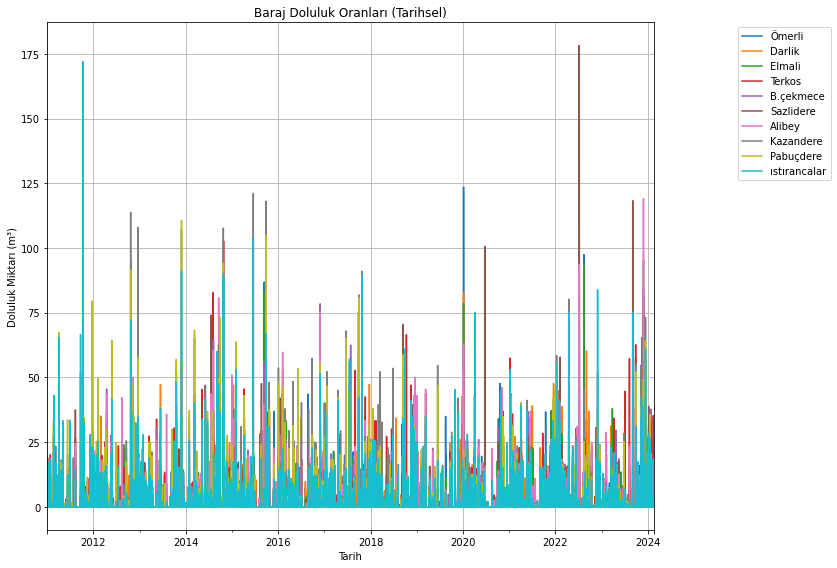

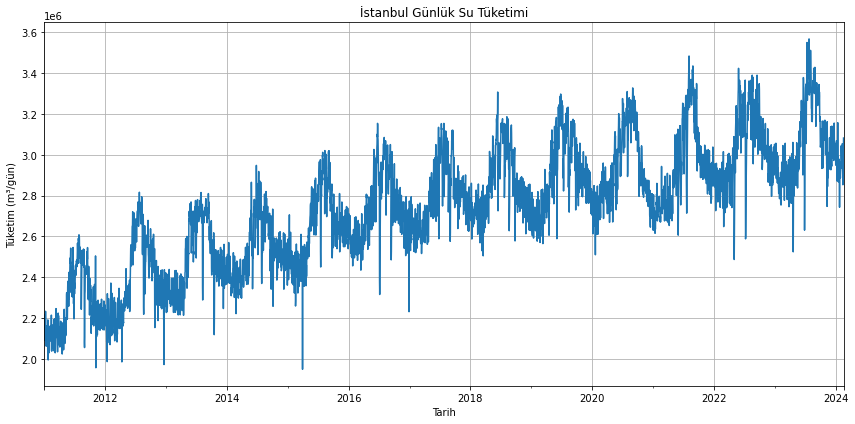

In [4]:
import matplotlib.pyplot as plt

# Convert 'Tarih' to datetime format for better handling
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Set 'Tarih' as the index for time-series visualization
df.set_index('Tarih', inplace=True)

# Drop any columns that are not needed for visualization
df_cleaned = df.drop(columns=['Unnamed: 11'])

# Plot water levels in all reservoirs over time
plt.figure(figsize=(12, 8))
df_cleaned.drop(columns=['İstanbul günlük tüketim(m³/gün)']).plot(ax=plt.gca())
plt.title('Baraj Doluluk Oranları (Tarihsel)')
plt.ylabel('Doluluk Miktarı (m³)')
plt.xlabel('Tarih')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

# Plot daily water consumption over time
plt.figure(figsize=(12, 6))
df_cleaned['İstanbul günlük tüketim(m³/gün)'].plot()
plt.title('İstanbul Günlük Su Tüketimi')
plt.ylabel('Tüketim (m³/gün)')
plt.xlabel('Tarih')
plt.grid(True)
plt.tight_layout()
plt.show()


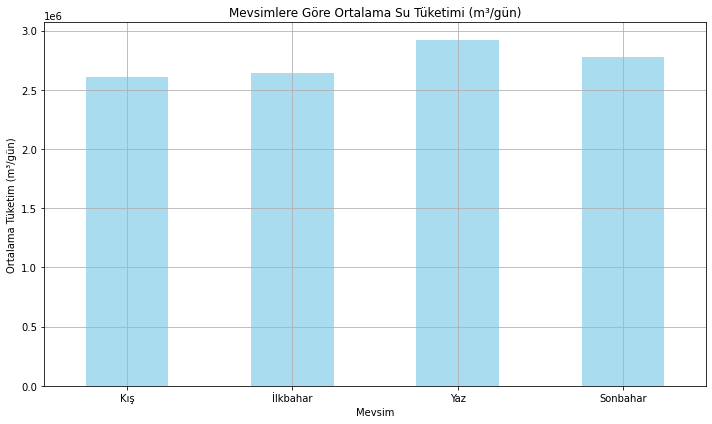

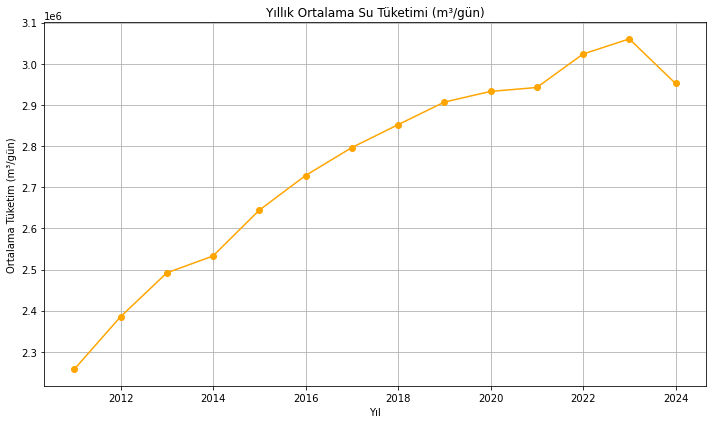

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Data is assumed to be in df_cleaned with 'Tarih' as index and 'İstanbul günlük tüketim(m³/gün)' as the relevant column

# 1. Mevsimsel Eğilimler: Her mevsimin ortalama su tüketimini hesapla
# 'Tarih' sütununu kullanarak mevsimleri bulalım
df_cleaned['Month'] = df_cleaned.index.month
df_cleaned['Season'] = df_cleaned['Month'] % 12 // 3 + 1  # 1: Kış, 2: İlkbahar, 3: Yaz, 4: Sonbahar

# Her mevsim için ortalama su tüketimini hesapla
seasonal_consumption = df_cleaned.groupby('Season')['İstanbul günlük tüketim(m³/gün)'].mean()

# Sezon adları
seasons = {1: 'Kış', 2: 'İlkbahar', 3: 'Yaz', 4: 'Sonbahar'}
seasonal_consumption.index = seasonal_consumption.index.map(seasons)

# 2. Yıllık Eğilimler: Her yıl için ortalama su tüketimini hesapla
df_cleaned['Year'] = df_cleaned.index.year
annual_consumption = df_cleaned.groupby('Year')['İstanbul günlük tüketim(m³/gün)'].mean()

# 3. Mevsimsel eğilimlerin görselleştirilmesi
plt.figure(figsize=(10, 6))
seasonal_consumption.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Mevsimlere Göre Ortalama Su Tüketimi (m³/gün)')
plt.xlabel('Mevsim')
plt.ylabel('Ortalama Tüketim (m³/gün)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Yıllık eğilimlerin görselleştirilmesi
plt.figure(figsize=(10, 6))
annual_consumption.plot(color='orange', marker='o', linestyle='-')
plt.title('Yıllık Ortalama Su Tüketimi (m³/gün)')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Tüketim (m³/gün)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [5]:
pip install tensorflow
















































  Attempting uninstall: tensorboard-data-server

    Found existing installation: tensorboard-data-server 0.6.1

    Uninstalling tensorboard-data-server-0.6.1:

      Successfully uninstalled tensorboard-data-server-0.6.1


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the data for the LSTM model
data_consumption = df_cleaned[['İstanbul günlük tüketim(m³/gün)']].values

# Scale the data between 0 and 1 for better performance in the LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_consumption)

# Create a function to split data into sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define the time step for sequences
time_step = 60

# Create the sequences
X, y = create_sequences(data_scaled, time_step)

# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=64, epochs=10, verbose=1)

# Prepare the future predictions
last_60_days = data_scaled[-60:]  # Take the last 60 days
future_predictions = []

# Predict the next 30 days
for _ in range(30):
    next_input = last_60_days.reshape(1, time_step, 1)
    next_prediction = model.predict(next_input)
    future_predictions.append(next_prediction[0, 0])
    last_60_days = np.append(last_60_days[1:], next_prediction)  # Update the sequence

# Inverse transform predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_predictions


Epoch 1/10

74/74 [==============================] - 10s 57ms/step - loss: 0.0145

Epoch 2/10

74/74 [==============================] - 4s 49ms/step - loss: 0.0037

Epoch 3/10

74/74 [==============================] - 4s 47ms/step - loss: 0.0036

Epoch 4/10

74/74 [==============================] - 3s 47ms/step - loss: 0.0037

Epoch 5/10

74/74 [==============================] - 3s 46ms/step - loss: 0.0036

Epoch 6/10

74/74 [==============================] - 3s 46ms/step - loss: 0.0035

Epoch 7/10

74/74 [==============================] - 3s 46ms/step - loss: 0.0035

Epoch 8/10

74/74 [==============================] - 3s 47ms/step - loss: 0.0033

Epoch 9/10

74/74 [==============================] - 4s 47ms/step - loss: 0.0032

Epoch 10/10

74/74 [==============================] - 4s 60ms/step - loss: 0.0031

1/1 [==============================] - 1s 821ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [=============

array([[2949542. ],
       [2958237.8],
       [2961159.5],
       [2961638.2],
       [2961065.2],
       [2960037.8],
       [2958832. ],
       [2957587.8],
       [2956381.5],
       [2955255.5],
       [2954233.2],
       [2953323. ],
       [2952524.2],
       [2951828.5],
       [2951224.8],
       [2950698. ],
       [2950233.5],
       [2949815.5],
       [2949430.5],
       [2949065. ],
       [2948709.5],
       [2948355.8],
       [2947997.8],
       [2947631.8],
       [2947254.2],
       [2946866.2],
       [2946464.8],
       [2946053. ],
       [2945632. ],
       [2945202.8]], dtype=float32)

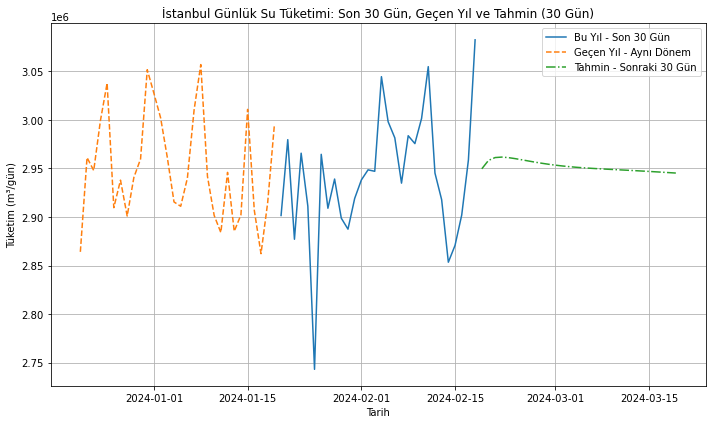

In [13]:
# Visualizing predictions with past consumption for different periods and years

# Step 1: Extract the last 30 days of data from the current year
last_30_days_current_year = df_cleaned['İstanbul günlük tüketim(m³/gün)'].tail(30)

# Step 2: Extract the same 30 days from the previous year
same_period_last_year = df_cleaned['İstanbul günlük tüketim(m³/gün)'].shift(365).tail(60).head(30)

# Step 3: Define a date range for the predicted 30 days
next_30_days_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Step 4: Plot the last 30 days, previous year's same period, and predicted values for the next 30 days

plt.figure(figsize=(10, 6))

# Plot last 30 days for the current year
plt.plot(last_30_days_current_year.index, last_30_days_current_year.values, label='Bu Yıl - Son 30 Gün')

# Plot the same period from last year
plt.plot(same_period_last_year.index, same_period_last_year.values, label='Geçen Yıl - Aynı Dönem', linestyle='--')

# Plot the predicted values for the next 30 days
plt.plot(next_30_days_index, future_predictions, label='Tahmin - Sonraki 30 Gün', linestyle='-.')

plt.title('İstanbul Günlük Su Tüketimi: Son 30 Gün, Geçen Yıl ve Tahmin (30 Gün)')
plt.xlabel('Tarih')
plt.ylabel('Tüketim (m³/gün)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Baraj doluluk oranı su tüketimini 2025 yılında karşılamayabilir.


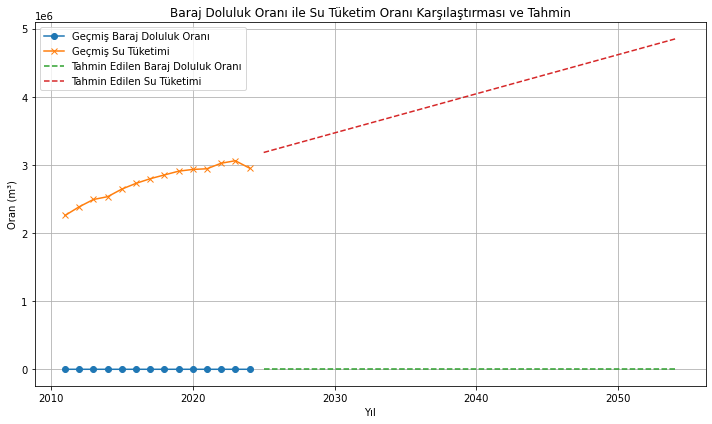

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Yıllık ortalama su tüketimi ve baraj doluluk oranlarını hesaplayalım
# Baraj doluluk sütunlarının toplamını alarak toplam doluluk oranını hesaplıyoruz.
reservoir_columns = ['Ömerli', 'Darlik', 'Elmali', 'Terkos', 'B.çekmece', 'Sazlidere', 'Alibey', 'Kazandere', 'Pabuçdere', 'ıstırancalar']
df_cleaned['Total_Reservoir_Level'] = df_cleaned[reservoir_columns].sum(axis=1)
annual_reservoir_level = df_cleaned.groupby('Year')['Total_Reservoir_Level'].mean()
annual_consumption = df_cleaned.groupby('Year')['İstanbul günlük tüketim(m³/gün)'].mean()

# 2. Linear regression kullanarak doluluk ve tüketim trendlerini tahmin edelim
years = np.array(annual_reservoir_level.index).reshape(-1, 1)

# Baraj doluluk trendi için model
reservoir_model = LinearRegression()
reservoir_model.fit(years, annual_reservoir_level.values)

# Su tüketim trendi için model
consumption_model = LinearRegression()
consumption_model.fit(years, annual_consumption.values)

# 3. Gelecek 30 yıl için su tüketimi ve baraj doluluk oranlarını tahmin edelim
future_years = np.arange(annual_reservoir_level.index[-1] + 1, annual_reservoir_level.index[-1] + 31).reshape(-1, 1)
reservoir_forecast = reservoir_model.predict(future_years)
consumption_forecast = consumption_model.predict(future_years)

# 4. Doluluk ve tüketim oranlarının birbirini ne zaman karşılamayacağını analiz edelim
# Bu durumu tahmin edilen yıllarda baraj doluluk oranının su tüketim oranından azaldığı durumlarda inceleyeceğiz.
for year, reservoir, consumption in zip(future_years.flatten(), reservoir_forecast, consumption_forecast):
    if consumption > reservoir:
        print(f"Baraj doluluk oranı su tüketimini {year} yılında karşılamayabilir.")
        break

# 5. Tahmin sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(annual_reservoir_level.index, annual_reservoir_level.values, label='Geçmiş Baraj Doluluk Oranı', marker='o')
plt.plot(annual_consumption.index, annual_consumption.values, label='Geçmiş Su Tüketimi', marker='x')
plt.plot(future_years, reservoir_forecast, label='Tahmin Edilen Baraj Doluluk Oranı', linestyle='--')
plt.plot(future_years, consumption_forecast, label='Tahmin Edilen Su Tüketimi', linestyle='--')

plt.title('Baraj Doluluk Oranı ile Su Tüketim Oranı Karşılaştırması ve Tahmin')
plt.xlabel('Yıl')
plt.ylabel('Oran (m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
